# Lecture 3

# Exercise 5: Nested Sampling

As usual, we start with some setup:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


We will also use a new library here, called UltraNest, for nested sampling

In [2]:
import ultranest

Our goal will be to compare how well two models fit the data, LambdaCDM, where dark energy is a cosmological constant, and wCDM, where it can vary with a fixed equation of state $w(z) \equiv - p / \rho c^2 = w_0$.

Astropy has a model class for each of these.

In [3]:
from astropy.cosmology import LambdaCDM, wCDM

We will use the same Pantheon data as before:

In [4]:
# Load in the data
z_obs, m_obs = np.loadtxt("./data.txt").T
C = np.loadtxt("./cov.txt")
invC = np.linalg.inv(C)

Last exercise you wrote functions to compute the theory model and liklihood of the Pantheon data under the Lambda CDM model.
Copy those in here, but rename them `model_lcdm` and `loglike_lcdm`.

If you didn't complete the exercise, you can find model answers in the Lecture 2 Answers notebook.

In [5]:
# Copy your functions in here.
def model_lcdm(H0, Omega_matter, Omega_lambda, M0, z):
    cosmo = LambdaCDM(H0=H0, Om0=Omega_matter, Ode0=Omega_lambda)
    mu = cosmo.distmod(z)
    m = mu.value + M0
    return m

def loglike_lcdm(p):
    H0, Omega_matter, Omega_de, M0 = p
    m_pred = model_lcdm(H0, Omega_matter, Omega_de, M0, z_obs)
    d = m_pred - m_obs
    L = -0.5 * d @ invC @ d
    return L



We will be comparing to the wCDM model, so will need equivalent `model_wcdm` and `loglike_wcdm` functions to match these.
Write these functions here, remembering that we have a new parameter `w0` that needs to be included throughout

In [6]:
# Complete these functions

def model_wcdm(H0, Omega_matter, Omega_lambda, M0, w0, z):
    cosmo = wCDM(H0=H0, Om0=Omega_matter, Ode0=Omega_lambda, w0=w0)
    mu = cosmo.distmod(z)
    m = mu.value + M0
    return m


def loglike_wcdm(p):
    H0, Omega_matter, Omega_de, M0, w0 = p
    m_pred = model_wcdm(H0, Omega_matter, Omega_de, M0, w0, z_obs)
    d = m_pred - m_obs
    L = -0.5 * d @ invC @ d
    return L

Since nested sampling gradually moves in from the edges of the prior space, we need to specify what those priors
are and how to transform from the *unit cube*, to parameter values.

This means converting a number between 0 and 1 for each parameter to the full parameter space.  In general it would use the cumulative density function of the prior on each parameter, but to keep things simple we'll use uniform priors here, which makes everything much easier.

In this case, for each parameter we transform $u_i$ which is between 0 and 1 to $x_i$ which is between some minimum and maximum we specify, using $x_i = \mathrm{min}_i + (\mathrm{max}_i - \mathrm{min}_i) \cdot u_i$

In [7]:
# These are the min and max values we will use for each parameters.  What is the physical motivation behind each?
mins_lcdm = np.array([60., 0., 0., -20.])
maxs_lcdm = np.array([80., 1., 1., -18.])
mins_wcdm = np.array([60., 0., 0., -20., -2.])
maxs_wcdm = np.array([80., 1., 1., -18., -0.5])


def prior_transform_wcdm(u):
    x = mins_wcdm + u * (maxs_wcdm - mins_wcdm)
    return x

def prior_transform_lcdm(u):
    x = mins_lcdm + u * (maxs_lcdm - mins_lcdm)
    return x


Now we can run our Nested Sampler.  We will use the most basic sampler that UltraNest offers - it also has more advanced versions that can be faster.

First we will do this for LambdaCDM.  It may take a minute or two to complete.

In [8]:
param_names_lcdm = ['H0', 'Omega_matter', 'Omega_lambda', 'M0']
sampler_lcdm = ultranest.NestedSampler(param_names_lcdm, loglike_lcdm, prior_transform_lcdm, log_dir="./lcdm", num_live_points=100)
result_lcdm = sampler_lcdm.run()

Creating directory for new run ./lcdm/run8
[ultranest.integrator.NestedSampler] Num live points [100]
[ultranest.integrator.NestedSampler] Resuming...
[ultranest.integrator.NestedSampler] Starting sampling ...


Z=-3e+01+-4e+01 | Like=-2e+01..-2e+01 | it/evals=1620/24941 eff=6.4953%   
niter: 1622
 ncall: 25012
 nsamples: 1722
 logz: -28.849 +/-  0.278
 h:  7.729


Use the `print_results` method on the `sampler_lcdm` object to see the log of the estimated evidence Z:

In [9]:
sampler_lcdm.print_results()


logZ = -28.849 +- 0.278

    H0                  70.2 +- 5.7
    Omega_matter        0.322 +- 0.073
    Omega_lambda        0.74 +- 0.11
    M0                  -19.35 +- 0.18


Now we'll do the same for wCDM - write equivalent code for that model here and run it.

It will take a bit longer as it has an additional parameter.

In [10]:
# Complete this code

param_names_wcdm = ['H0', 'Omega_matter', 'Omega_lambda', 'M0', 'w0']
sampler_wcdm = ultranest.NestedSampler(param_names_wcdm, loglike_wcdm, prior_transform_wcdm, log_dir="./wcdm", num_live_points=100)
result_wcdm = sampler_wcdm.run()


Creating directory for new run ./wcdm/run8
[ultranest.integrator.NestedSampler] Num live points [100]
[ultranest.integrator.NestedSampler] Resuming...
[ultranest.integrator.NestedSampler] Starting sampling ...


Z=-3e+01+-4e+01 | Like=-2e+01..-2e+01 | it/evals=1700/59496 eff=2.8573%  
niter: 1710
 ncall: 59987
 nsamples: 1810
 logz: -29.595 +/-  0.287
 h:  8.237


In [11]:
# Use the print_summary method on the sampler objects to print out log(Z) values
sampler_wcdm.print_results()


logZ = -29.595 +- 0.287

    H0                  69.6 +- 5.5
    Omega_matter        0.294 +- 0.078
    Omega_lambda        0.62 +- 0.19
    M0                  -19.37 +- 0.17
    w0                  -1.23 +- 0.33


The log(Z) values are stored in the dictionaries result_lcdm and result_wcdm.

Extract them and compute the difference in log(Z) and the relative probability of the two models.  What can you conclude?

What is the error on this number (the dictionaries also contain 'logzerr')

In [12]:
DeltaZ = sampler_lcdm.results['logz'] - sampler_wcdm.results['logz']
odds = np.exp(DeltaZ)
print(odds)

2.108544144254152


# Exercise 6: Healpix

We'll now use the library `healpy` to explore some Healpix maps of the CMB sky made from Planck Space Telescope data.

In [13]:
import healpy

Use the function `healpy.read_map` to load the Healpix file `"planck_cmb.fits"`.

This might generate a warning, which you can ignore.

In [14]:
# Complete this code
m = healpy.read_map("planck_cmb.fits")

/usr/local/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


The function above should also print the nside parameter, defining the resolution of the map.
Define it here so we can use it later.

In [15]:
# Complete this code
nside = 512

Use the function `healpy.mollview` to display the map:

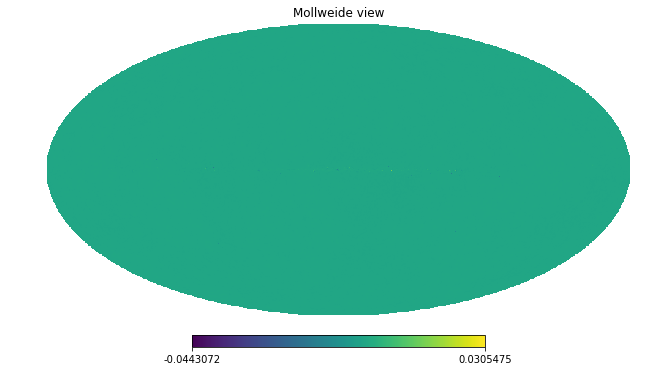

In [16]:
# Write your code here
healpy.mollview(m)

Uh oh!  The core of the galaxy is so bright that it outshines everything else in the map, so the color scale makes the map look the same all over (the CMB fluctuations are very small).

Explore values to use for the `min` and `max` options of `mollview` to make the fluctuations in the map visible clearly.

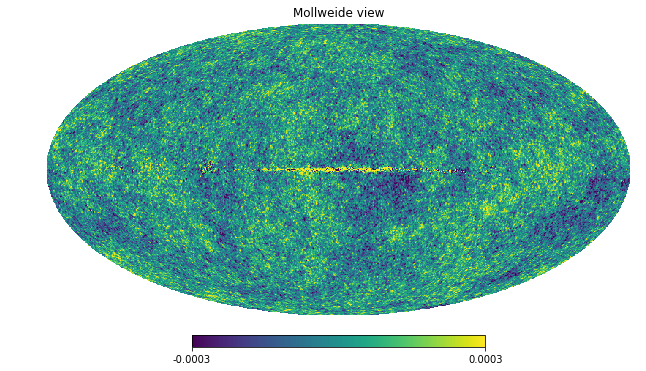

In [17]:
healpy.mollview(m, min=-3e-4, max=3e-4)

Find the coordinates of the brightest point in the map, first by finding its pixel index and then by converting to sky coordinates.

HINT: `np.argmax` finds the index of the maximum value of an array.  `healpy.pix2ang` can convert to coordinates.  

In [18]:
# Write your code here
i = np.argmax(m)
healpy.pix2ang(nside, i, lonlat=True)

(209.00390625, -19.392110554904093)

We will now measure the power spectrum of the map, which should roughly trace this famous plot:
    https://lambda.gsfc.nasa.gov/product/map/dr2/map_images/PowerSpectrum512.png
    
There are seveal issues with the map, so we won't get the result straight away.
        
Use `healpy.anafast` to compute the power spectrum `c_ell` of the map.

In [19]:
# Write your code here
cl = healpy.anafast(m)

Now plot it in the form `ell * (ell + 1) * c_ell / (2 * np.pi)`

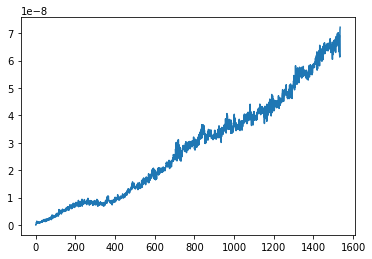

In [20]:
# Complete this code
ell = np.arange(cl.size)

f = ell*(ell+1)/2/np.pi
plt.plot(f * cl)

This doesn't look right yet! The bright core of the galaxy is the biggest contaminant.  Use the `gal_cut` argument to `anafast` to remove that region and plot it agan.

In [21]:
cl = healpy.anafast(m, gal_cut=10)

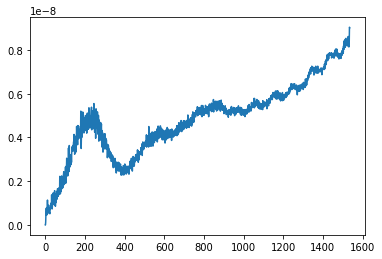

In [22]:
plt.plot(f * cl)

That should be a little better, but there is still a noise level of about 2.1e-14 in the power spectrum `c_ell` .  Plot a version with that subtracted.

HINT: Note that it's subtracted from `c_ell`, not `ell * (ell + 1) * c_ell / (2 * np.pi)`.


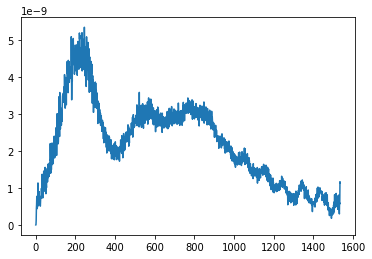

In [23]:
nl = 2.1e-14
plt.plot(f * (cl-nl))

At this Nside parameter the results of a transform are not very accurate above `2*Nside`.  Make a plot going up to just that ell value.

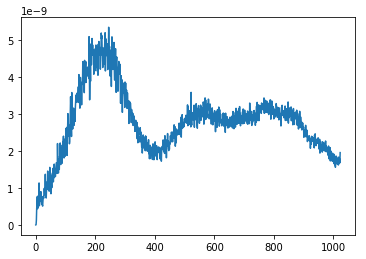

In [24]:
plt.plot((f * (cl-nl))[:1024])

This should look at least vageuly like the plot above now!

## Further exercises

- Run the nested sampling with more live points and compare results
- Investigate `ultranest.ReactiveNestedSampler` and see how it behaves differently.
- Use `healpy.ud_grade` to transform the map to one of lower resolution, and plot the change to the `C_ell` values.
- Use camb to generate a CMB power spectrum (take the first TT part), and transform it into a map using healpy.
